In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/schandrasekhar/kerasenv/lib/p

In [86]:
train_path = '/home/schandrasekhar/datasets/cats-and-dogs/train'
valid_path = '/home/schandrasekhar/datasets/cats-and-dogs/valid'
test_path = '/home/schandrasekhar/datasets/cats-and-dogs/test'

In [87]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [88]:
#plots images with labels within jupyter notebook
def plots(ims, figsize=(12, 6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose(0, 2, 3, 1)
    f= plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')    
    

In [67]:
imgs, labels = next(train_batches)

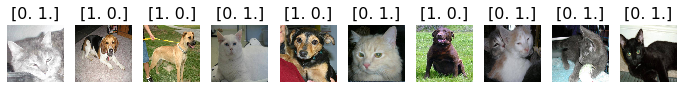

In [68]:
plots(imgs, titles=labels)

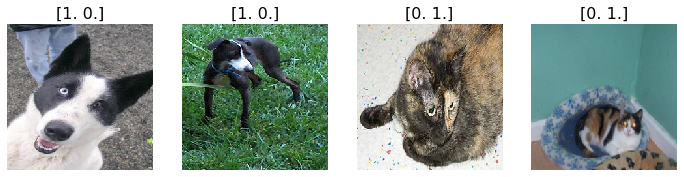

In [69]:
imgs, labels = next(valid_batches)
plots(imgs, titles=labels)

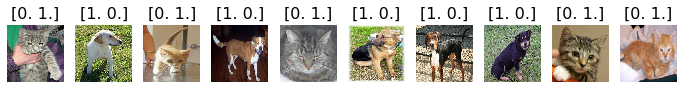

In [70]:
imgs, labels = next(test_batches)
plots(imgs, titles=labels)

## Build and train

In [71]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=3, epochs=5, verbose=2)

Epoch 1/5
4s - loss: 6.5757 - acc: 0.5250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
3s - loss: 8.8650 - acc: 0.4500 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
5s - loss: 8.4620 - acc: 0.4750 - val_loss: 6.7159 - val_acc: 0.5833
Epoch 4/5
5s - loss: 7.6561 - acc: 0.5250 - val_loss: 6.7159 - val_acc: 0.5833
Epoch 5/5
3s - loss: 8.4620 - acc: 0.4750 - val_loss: 6.7159 - val_acc: 0.5833


## Predict

/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


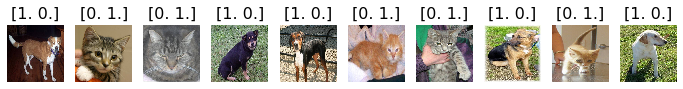

In [74]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [75]:
test_labels = test_labels[:, 0]
test_labels

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [76]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [77]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [78]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [80]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [81]:
def plot_confusion_matrics(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion metrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, withoug normalization")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, withoug normalization
[[0 5]
 [0 5]]


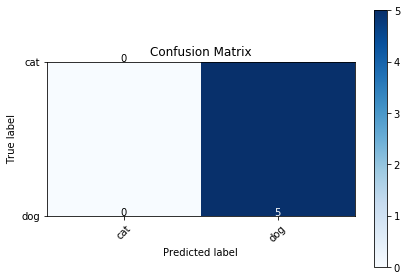

In [82]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrics(cm, cm_plot_labels, title='Confusion Matrix')

## Build fine tune VGG16 model

In [21]:
#requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [22]:
vgg16_model = keras.applications.vgg16.VGG16()

In [23]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
type(vgg16_model)

keras.engine.training.Model

In [39]:
model_vgg16_custom = Sequential()
for layer in vgg16_model.layers:
    model_vgg16_custom.add(layer)

In [40]:
model_vgg16_custom.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [41]:
model_vgg16_custom.layers.pop()

In [42]:
model_vgg16_custom.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [43]:
for layer in model.layers:
    layer.trainable = False

In [44]:
model_vgg16_custom.add(Dense(2, activation='softmax'))

In [45]:
model_vgg16_custom.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## Train the fine-tuned VGG16 model

In [46]:
model_vgg16_custom.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model_vgg16_custom.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=3, epochs=5, verbose=2)

Epoch 1/5
24s - loss: 0.6944 - acc: 0.5250 - val_loss: 0.6859 - val_acc: 0.6667
Epoch 2/5
24s - loss: 0.6825 - acc: 0.7000 - val_loss: 0.6813 - val_acc: 0.7500
Epoch 3/5
22s - loss: 0.6779 - acc: 0.8000 - val_loss: 0.6788 - val_acc: 0.6667
Epoch 4/5
23s - loss: 0.6680 - acc: 0.8750 - val_loss: 0.6721 - val_acc: 0.7500
Epoch 5/5
27s - loss: 0.6612 - acc: 0.9250 - val_loss: 0.6709 - val_acc: 0.6667


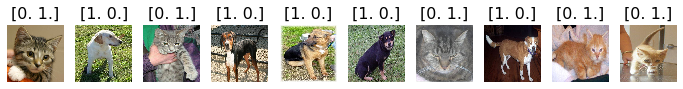

In [48]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [36]:
test_labels= test_labels[:, 0]
test_labels

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [83]:
predictions_vgg16_custom = model_vgg16_custom.predict_generator(test_batches, steps=1, verbose=0)

In [84]:
predictions_vgg16_custom

array([[0.50903374, 0.49096626],
       [0.52452064, 0.47547936],
       [0.4824561 , 0.5175439 ],
       [0.50875306, 0.49124694],
       [0.4722072 , 0.5277928 ],
       [0.48820192, 0.511798  ],
       [0.5222922 , 0.4777078 ],
       [0.51977146, 0.4802286 ],
       [0.47149643, 0.52850354],
       [0.4879496 , 0.5120504 ]], dtype=float32)

In [56]:
cm_vgg16_custom = confusion_matrix(test_labels, predictions_vgg16_custom[:,0])

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous targets

In [ ]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrics(cm, cm_plot_labels, title='Confusion Matrix')

## Data Augmentation

In [101]:
from keras.preprocessing.image import ImageDataGenerator
from scipy import misc, ndimage
import imageio

In [98]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                        channel_shift_range=10, horizontal_flip=True)

In [92]:
image_path = '/home/schandrasekhar/datasets/cats-and-dogs/train/dog/137.jpg'

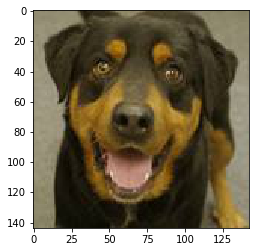

In [103]:
# Obtain image
#image = np.expand_dims(ndimage.imread(image_path), 0)
image = np.expand_dims(imageio.imread(image_path), 0)
plt.imshow(image[0])

In [105]:
# generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [106]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

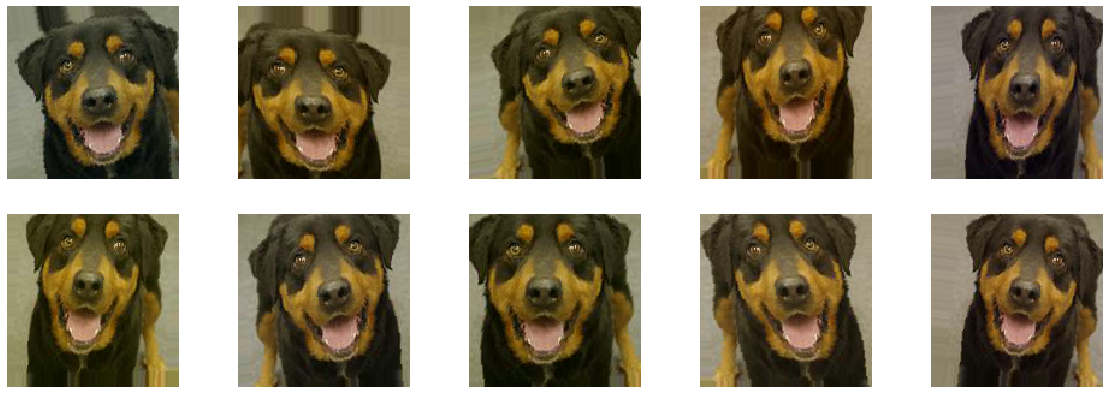

In [107]:
plots(aug_images, figsize=(20, 7), rows=2)